In [7]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換
import pathlib

In [8]:
def basic_array_info(array: np.ndarray):
    print("Type: ", type(array))
    print("Shape: ", array.shape)
    print("Max: ", array.max())
    print("Min: ", array.min())
    print("Mean: ", array.mean())
    print("Standard Deviation", np.std(array))

# basic_array_info(f_transform)

In [23]:
origin_image_path = pathlib.Path(r'F:\Code\Digital-Image-Processing\Code\Resources\Private_Data\Exp_20240910_Panel\NTHU_3.tif')
# origin_image_path = pathlib.Path(r'F:\Code\Digital-Image-Processing\Code\Resources\Data\noisy_man.jpg')
origin_name = origin_image_path.stem
origin_name

'NTHU_3'

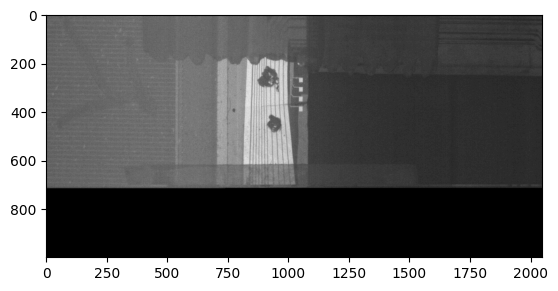

In [24]:
# # 讀取圖片，使用灰階模式
# origin = cv2.imread(origin_image_path.as_posix(), cv2.IMREAD_GRAYSCALE)

origin = cv2.imread(origin_image_path.as_posix())
origin = origin[:, :, 0]

plt.imshow(origin, cmap="gray")

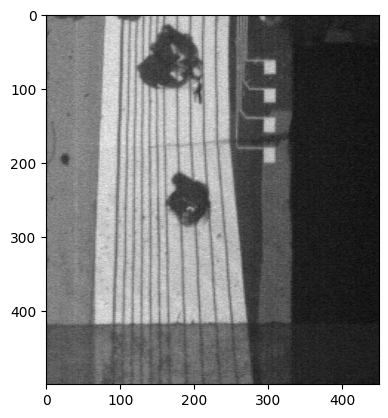

In [25]:
origin = origin[200:700, 750:1200]
plt.imshow(origin, cmap='gray')

In [63]:
def histogram_show(image):
    """顯示圖片的直方圖"""
    
    plt.hist(image.ravel(), bins=256, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

In [64]:
def fourier_show(image):
    """計算並顯示傅立葉頻譜和直方圖"""
    f_transform = fft2(image)  # 進行2D快速傅立葉變換
    f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度
    
    return f_transform_shifted, magnitude_spectrum

Text(0, 0.5, 'Frequency')

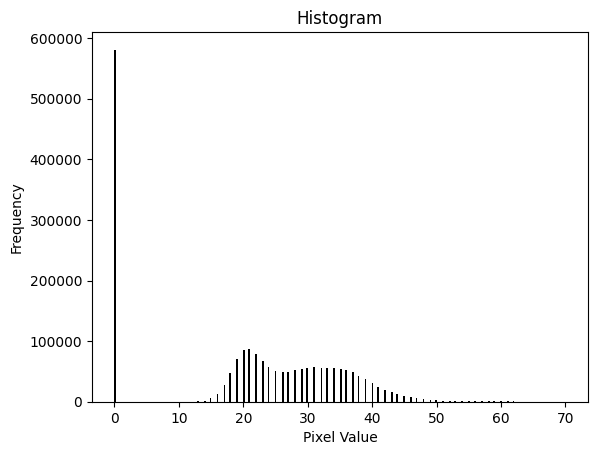

In [18]:
image = origin

plt.hist(image.ravel(), bins=256, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

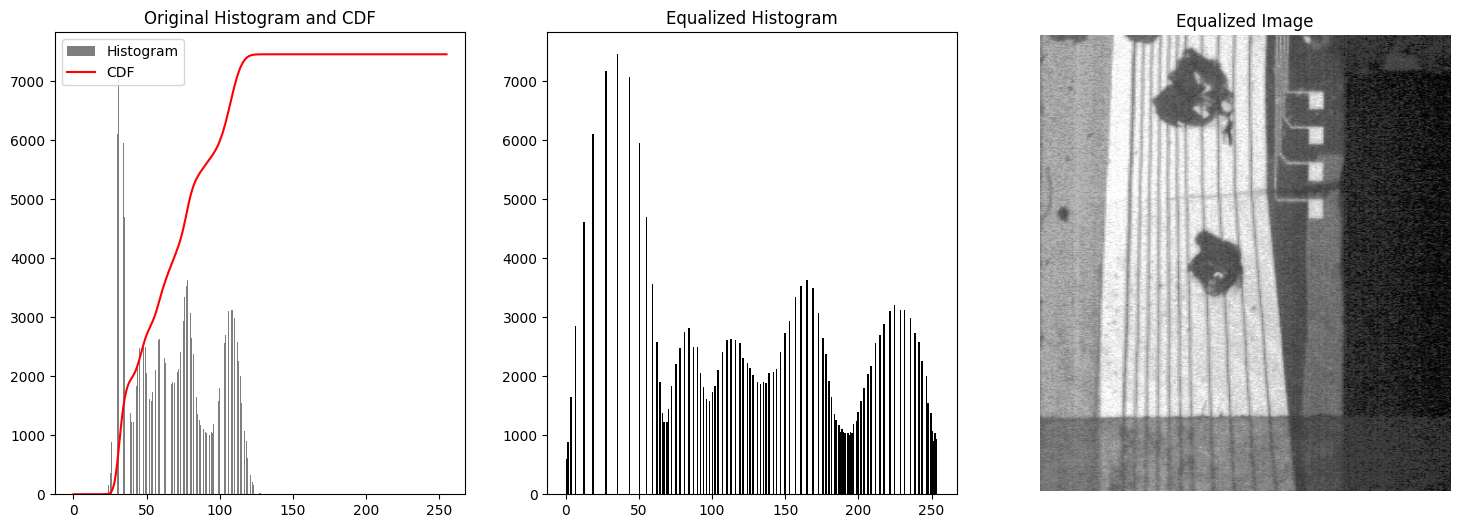

In [26]:
image = origin

# 計算原始圖像的直方圖
original_hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# 計算累積直方圖
cdf = original_hist.cumsum()
cdf_normalized = cdf * original_hist.max() / cdf.max()

# 掩蔽CDF中的零值，避免在後續計算中出現問題
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# 使用累積直方圖來進行影像規範化
image_equalized = cdf_final[image]

# 顯示規範化後的直方圖和圖片
plt.figure(figsize=(18, 6))

# 原始直方圖與累積直方圖
plt.subplot(1, 3, 1)
plt.hist(image.flatten(), bins=256, color='black', alpha=0.5, label='Histogram')
plt.plot(cdf_normalized, color='red', label='CDF')
plt.title('Original Histogram and CDF')
plt.legend(loc='upper left')

# 均衡化後圖片的直方圖
plt.subplot(1, 3, 2)
plt.hist(image_equalized.ravel(), bins=256, color='black')
plt.title('Equalized Histogram')

# 均衡化後的圖片
plt.subplot(1, 3, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()


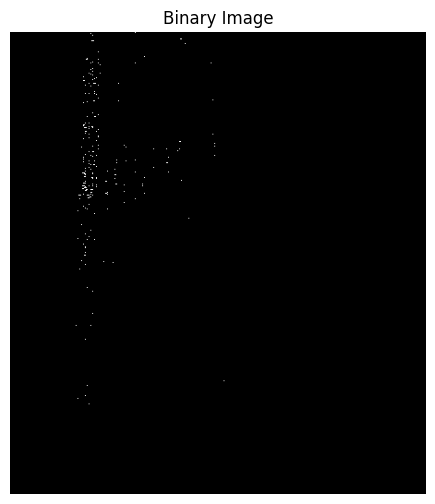

In [67]:
def image_binary(image, standard=2, threshold_value=False, print_image=True, print_threshold=False):
    mean = np.mean(image)
    std_dev = np.std(image)
    
    if not threshold_value:
        threshold_value = min(mean+std_dev*standard, 255) if mean+std_dev*standard >0 else 0
        threshold_value = int(threshold_value)
    
    # 根據門檻值進行二值化
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    if print_image:
    # 顯示二值化後的圖片
        plt.figure(figsize=(8, 6))
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image')
        plt.axis('off')
        plt.show()
    
    if print_threshold:
        print(f"mean+std_dev*standard: {mean+std_dev*standard}, final thershold = {threshold_value}")
    
    return binary_image

image = origin
binary_image = image_binary(image, standard=2, print_image=True, print_threshold=False)

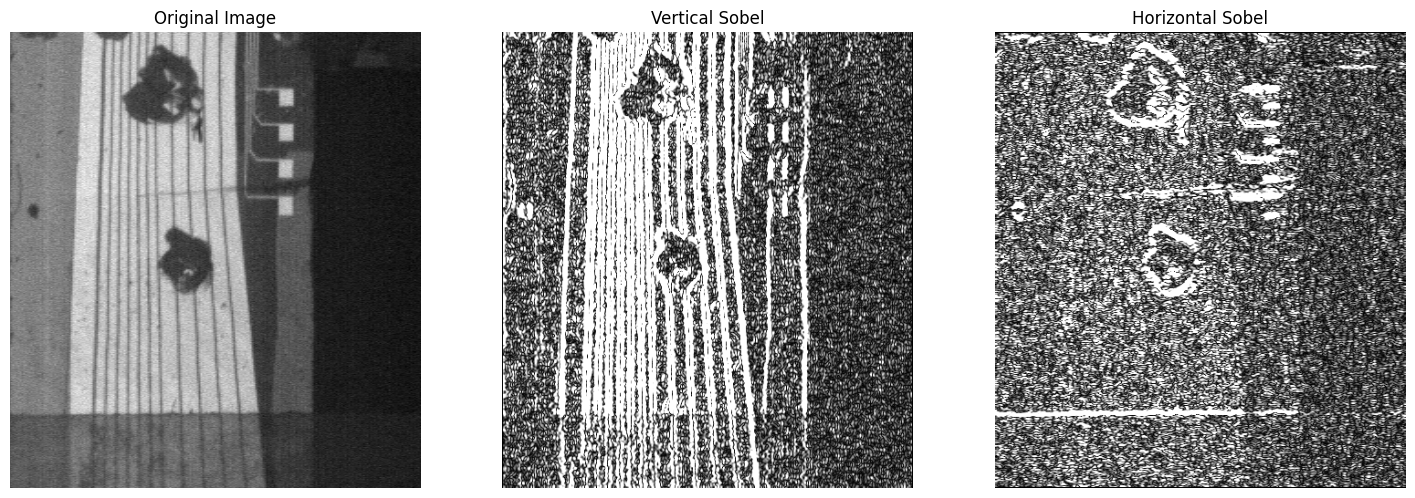

In [68]:
ksize = 5

# 應用垂直Sobel濾波
sobel_vertical = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)

# 轉換結果以便於顯示
sobel_vertical = np.abs(sobel_vertical)
sobel_vertical = np.uint8(np.clip(sobel_vertical, 0, 255))

# 應用水平Sobel濾波
sobel_horizontal = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)

# 轉換結果以便於顯示
sobel_horizontal = np.abs(sobel_horizontal)
sobel_horizontal = np.uint8(np.clip(sobel_horizontal, 0, 255))

# 顯示原始影像和Sobel垂直結果
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_vertical, cmap='gray')
plt.title('Vertical Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_horizontal, cmap='gray')
plt.title('Horizontal Sobel')
plt.axis('off')

plt.show()


mean+std_dev*standard: 311.6752100260648, final thershold = 255
mean+std_dev*standard: 265.92275722149316, final thershold = 255


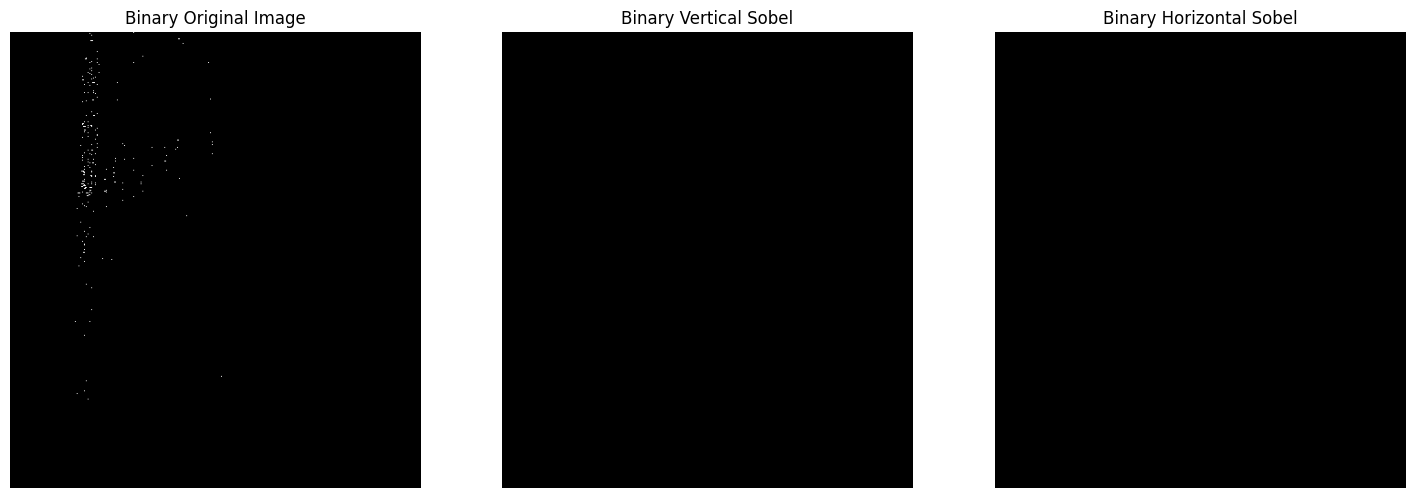

In [69]:
standard = 2

binary_image = image_binary(image, standard=standard, print_image=False)
binary_sobel_vertical = image_binary(sobel_vertical, standard=standard, print_image=False, print_threshold=True)
binary_sobel_horizontal = image_binary(sobel_horizontal, standard=standard, print_image=False, print_threshold=True)

# 顯示原始影像和Sobel垂直結果
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_sobel_vertical, cmap='gray')
plt.title('Binary Vertical Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_sobel_horizontal, cmap='gray')
plt.title('Binary Horizontal Sobel')
plt.axis('off')

plt.show()


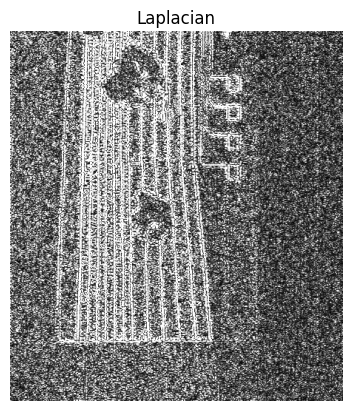

In [70]:
image = origin

# 應用拉普拉斯算子
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=5)  # 設置kernel size

# 將結果轉換為絕對值並縮放到8位
laplacian_abs = cv2.convertScaleAbs(laplacian)

plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.show()

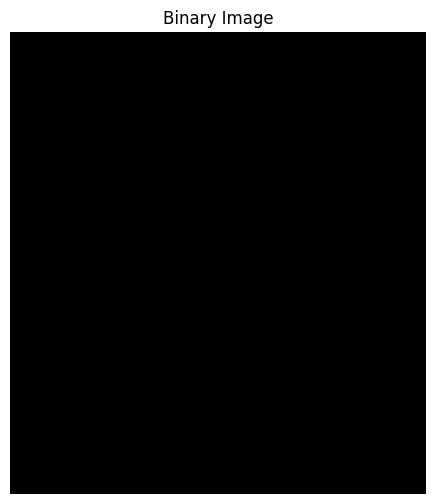

In [71]:
binary_laplacian_abs = image_binary(laplacian_abs)

In [72]:
def get_lines_hough(image, threshold=50, min_line_length=100, max_line_gap=25):
    # 使用 HoughLinesP 函數來檢測影像中的直線
    lines = cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=threshold,
                            minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    # 創建一個空白影像，用於繪製檢測到的直線
    lines_image = np.zeros_like(image)
    
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(lines_image, (x1, y1), (x2, y2), 255, 1)
    
    return lines_image

# lines_image = get_lines_hough(binary_laplacian_abs)
# plt.figure(figsize=(10, 10))
# plt.imshow(lines_image, cmap='gray')
# plt.title('Extracted Lines')
# plt.axis('off')

In [73]:
image = origin
lines_image_binary_laplacian_abs = get_lines_hough(binary_laplacian_abs)

lines_image_binary_sobel_horizontal = get_lines_hough(binary_sobel_horizontal)

lines_image_binary_sobel_vertical = get_lines_hough(binary_sobel_vertical)

(-0.5, 449.5, 499.5, -0.5)

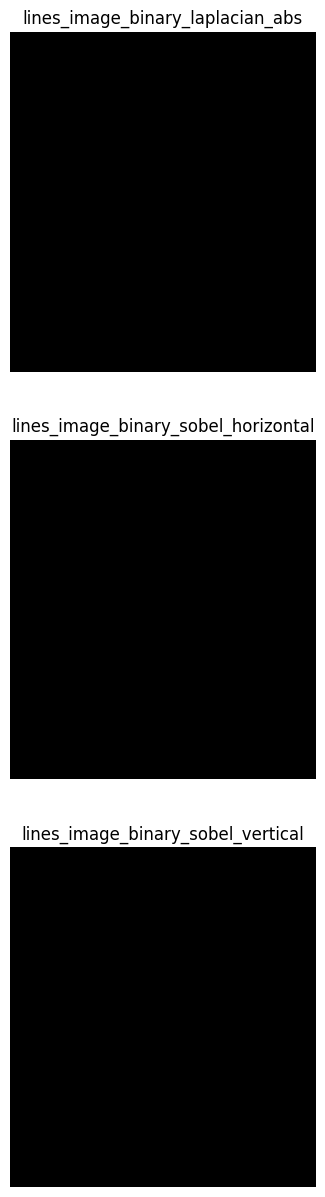

In [74]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
plt.imshow(lines_image_binary_laplacian_abs, cmap="gray")
plt.title('lines_image_binary_laplacian_abs')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(lines_image_binary_sobel_horizontal, cmap="gray")
plt.title('lines_image_binary_sobel_horizontal')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(lines_image_binary_sobel_vertical, cmap="gray")
plt.title('lines_image_binary_sobel_vertical')
plt.axis('off')

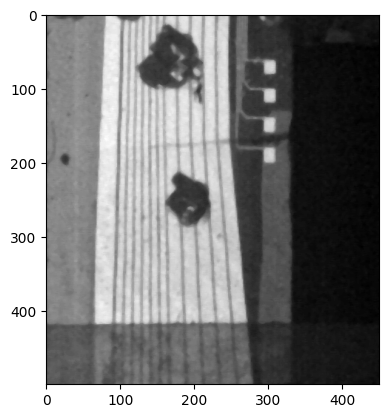

In [28]:
# 中值濾波器 (Median Filter)
image = origin
median_blurred_image = cv2.medianBlur(image, 5)
plt.imshow(median_blurred_image, cmap='gray')
# origin = median_blurred_image

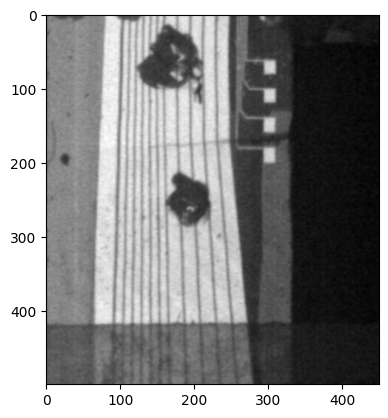

In [76]:
# 高斯濾波器
image = origin
gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(gaussian_blurred_image, cmap='gray')

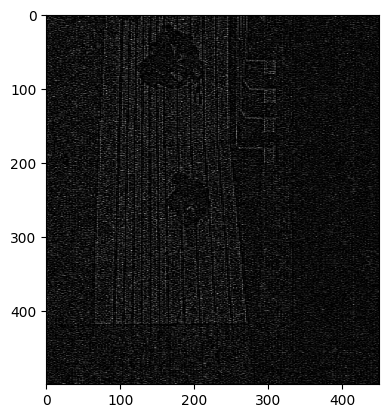

In [77]:
# 高通濾波
image = origin
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
high_pass_filtered_image = cv2.filter2D(image, -1, kernel)
plt.imshow(high_pass_filtered_image, cmap='gray')

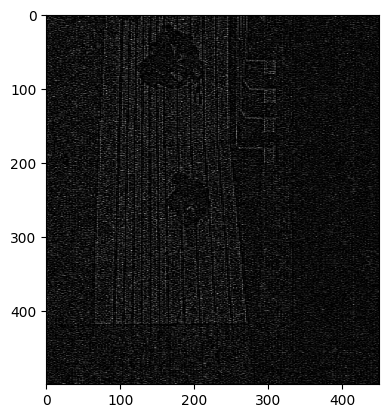

In [78]:
# 均值高通濾波器
image = origin
mean_filter = np.ones((5, 5), np.float32) / 25
mean_filtered = cv2.filter2D(image, -1, mean_filter)
high_pass_filter = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])
mean_highpass_filtered_image = cv2.filter2D(mean_filtered, -1, high_pass_filter)
plt.imshow(high_pass_filtered_image, cmap='gray')

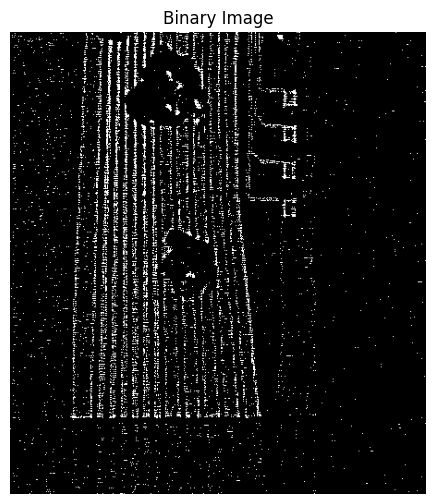

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [79]:
image_binary(mean_highpass_filtered_image)

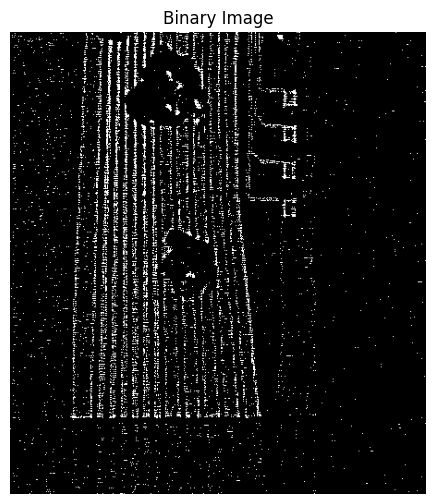

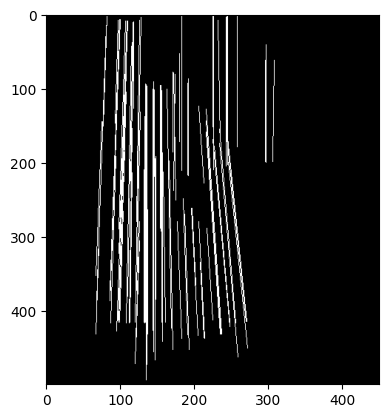

In [80]:
binary_image = image_binary(mean_highpass_filtered_image)
plt.imshow(get_lines_hough(binary_image), cmap='gray')

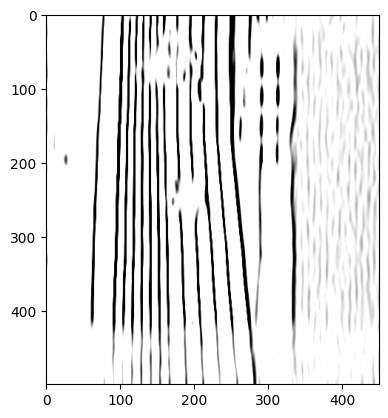

In [81]:
# 濾波器組（示例：Gabor 濾波器）
image = origin
def gabor_filter(image, ksize=31, sigma=4.0, theta=0, lambd=10.0, gamma=0.5, psi=0):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    return filtered_image

gabor_filtered_image = gabor_filter(image)
plt.imshow(gabor_filtered_image, cmap='gray')

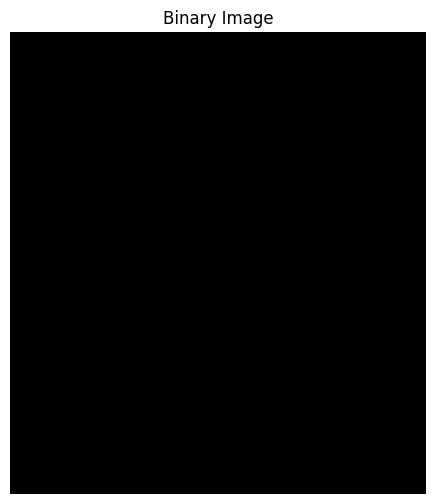

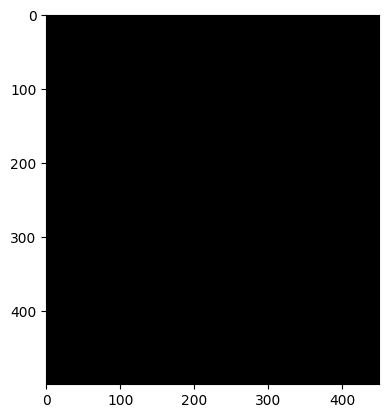

In [82]:
binary_image = image_binary(gabor_filtered_image)
plt.imshow(get_lines_hough(binary_image), cmap='gray')

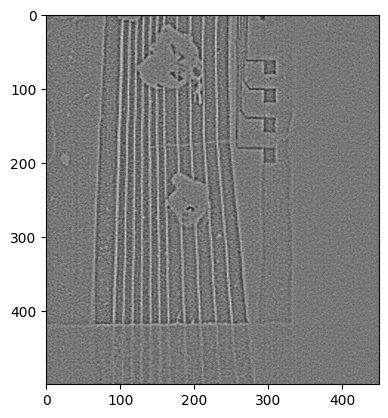

In [83]:
# Laplacian of Gaussian (LoG) 濾波
image = origin

def laplacian_of_gaussian(image, ksize=5, sigma=1.0):
    gaussian_blur = cv2.GaussianBlur(image, (ksize, ksize), sigma)
    laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
    return laplacian

log_filtered_image = laplacian_of_gaussian(image)
plt.imshow(log_filtered_image, cmap='gray')

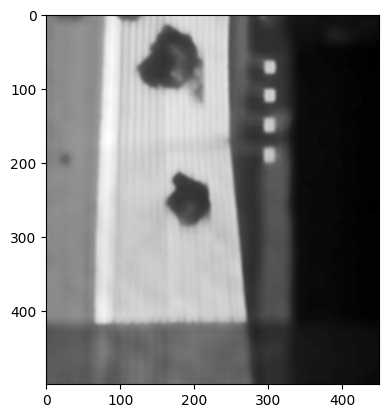

In [84]:
# 非局部均值濾波器 (Non-Local Means Filter)
image = origin

denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)
plt.imshow(denoised_image, cmap='gray')

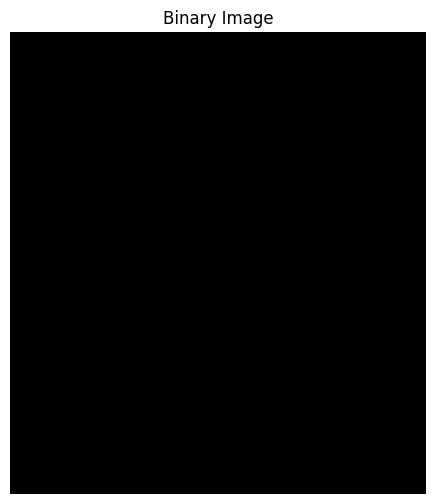

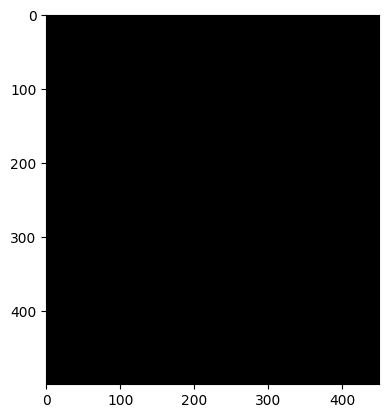

In [85]:
binary_image = image_binary(np.abs(denoised_image))
plt.imshow(get_lines_hough(binary_image), cmap='gray')

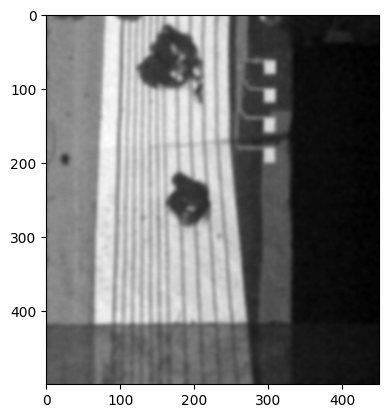

In [86]:
# 雙邊濾波器 (Bilateral Filter)
image = origin

bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
plt.imshow(bilateral_filtered_image, cmap='gray')

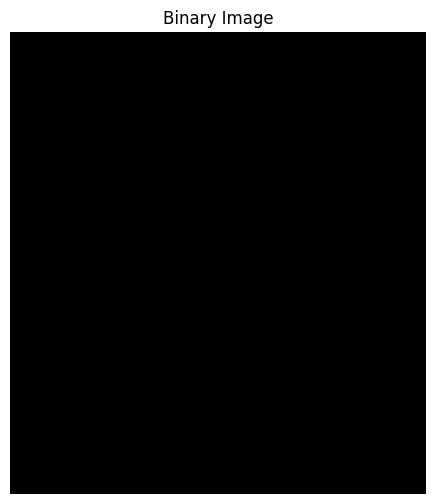

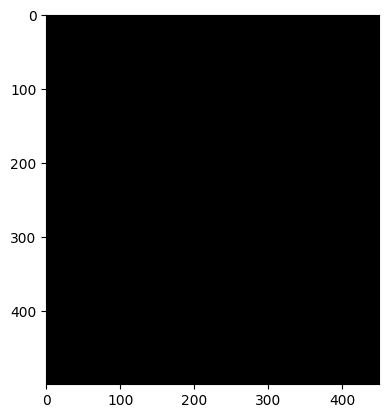

In [87]:
binary_image = image_binary(np.abs(bilateral_filtered_image))
plt.imshow(get_lines_hough(binary_image), cmap='gray')

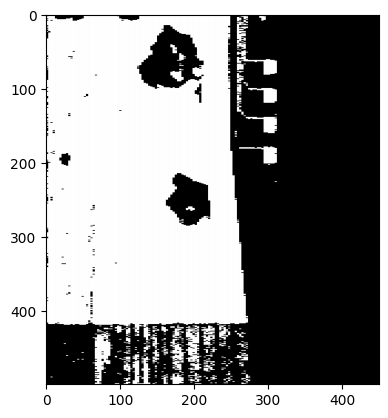

In [88]:
# K均值濾波器 (K-means Filter)
image = origin

Z = image.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 2
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((image.shape))
plt.imshow(result_image, cmap='gray')

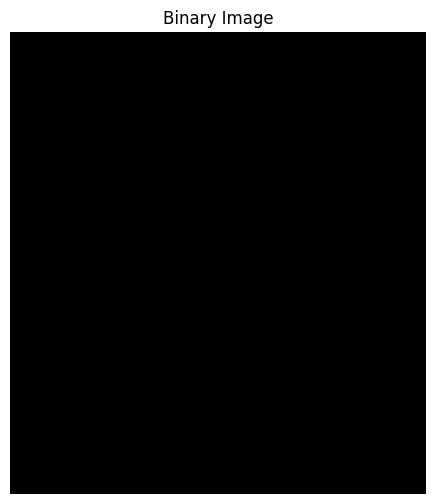

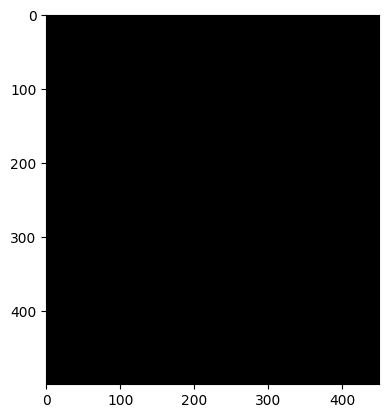

In [89]:
binary_image = image_binary(np.abs(result_image))
plt.imshow(get_lines_hough(binary_image), cmap='gray')


| 濾波器名稱                                      | 功能                          |
| ------------------------------------------ | --------------------------- |
| 高斯濾波器 (Gaussian Filter)                    | 平滑影像，減少雜訊                   |
| 方形濾波器 (Box Filter)                         | 均勻平滑影像                      |
| Sobel 濾波器                                  | 邊緣檢測                        |
| 拉普拉斯濾波器 (Laplacian Filter)                 | 強化邊緣                        |
| 均值濾波器 (Mean Filter)                        | 均勻平滑影像                      |
| 中值濾波器 (Median Filter)                      | 消除鹽椒雜訊                      |
| 雙邊濾波器 (Bilateral Filter)                   | 平滑影像，保留邊緣                   |
| 均值高通濾波 (High-Pass Filter)                  | 強化高頻細節                      |
| Gabor 濾波器                                  | 邊緣及紋理檢測                     |
| LoG 濾波 (Laplacian of Gaussian)             | 邊緣檢測及平滑                     |
| 非局部均值濾波器                                   | 降噪                          |
| K均值濾波器 (K-means Filter)                    | 影像分割                        |
| 自適應濾波器 (Adaptive Filter)                   | 自適應降噪                       |
| 霍夫變換 (Hough Transform)                     | 線形和圓形檢測                     |
| DCT (Discrete Cosine Transform)            | 影像壓縮                        |
| 傅立葉變換 (Fourier Transform)                  | 頻譜分析                        |
| Wiener 濾波器                                 | 降噪與去模糊                      |
| 各向異性擴散 (Anisotropic Diffusion)             | 去噪，保留邊緣                     |
| 馬爾可夫隨機場 (Markov Random Field)              | 影像分割                        |
| 形態學濾波 (Morphological Filter)               | 二值影像處理                      |
| 曲率濾波器 (Curvature Filter)                   | 平滑曲面                        |
| 總變分濾波器 (Total Variation Filter)            | 去噪，保留邊緣                     |
| 小波濾波器 (Wavelet Filter)                     | 多尺度影像處理                     |
| 引導濾波器 (Guided Filter)                      | 保留邊緣的平滑                     |
| 高通濾波器 (High-Pass Filter)                   | 增強細節                        |
| 低通濾波器 (Low-Pass Filter)                    | 去除雜訊                        |
| 諧波平均濾波器 (Harmonic Mean Filter)             | 降低光暈效應                      |
| Non-Local Means Denoising Filter           | 非局部降噪                       |
| Total Variation Denoising                  | 保留邊緣的降噪                     |
| Domain Transform Filter                    | 邊緣保護平滑                      |
| RPCA (Robust Principal Component Analysis) | 去除背景干擾                      |
| Shock Filter                               | 增強邊緣                        |
| Bilateral Total Variation Filter           | 平滑與邊緣保護                     |
| Adaptive Manifold Filter                   | 保留細節的平滑                     |
| Histogram Equalization                     | 增強對比                        |
| CLAHE                                      | 局部對比增強                      |
| Kuwahara Filter                            | 降噪與保留細節                     |
| Butterworth Filter                         | 頻率範圍內平滑                     |
| Gabor Wavelet Transform                    | 紋理分析                        |
| Prewitt Filter                             | 用於邊緣檢測，類似於 Sobel 濾波器。       |
| Scharr Filter                              | 加強的邊緣檢測濾波器，對噪聲更為敏感。         |
| Unsharp Masking                            | 銳化濾波器，用於增強影像邊緣。             |
| Laplacian Pyramid                          | 多尺度影像分解，用於影像壓縮與合成。          |
| Frangi Filter                              | 用於血管結構檢測的濾波器。               |
| Hessian Filter                             | 用於加強血管和纖維結構的檢測。             |
| Ridge Filter                               | 專門用於提取線狀結構，如紋理或血管。          |
| Difference of Gaussian (DoG) Filter        | 用於邊緣檢測，計算兩個高斯濾波影像之差。        |
| Median Absolute Deviation (MAD) Filter     | 用於去除雜訊的健壯統計濾波器。             |
| Gaussian Pyramid                           | 多尺度影像分析，通常與拉普拉斯金字塔結合使用。     |
| Rank Filter                                | 用於選擇影像中像素的排序統計量，如最大值、最小值。   |
| Maximum Filter                             | 強化影像中亮點，適合於影像分割前處理。         |
| Minimum Filter                             | 強化影像中暗點，適合於影像分割前處理。         |
| Entropy Filter                             | 計算局部區域的熵，用於紋理分析。            |
| Local Binary Patterns (LBP) Filter         | 用於紋理分析和特徵提取。                |
| Non-Linear Diffusion Filter                | 用於去噪，保留影像細節。                |
| Median Flow Filter                         | 用於穩健的光流追蹤。                  |
| Rolling Ball Filter                        | 用於背景扣除，特別是在生物醫學影像中。         |
| Unsharp Masking                            | 用於增加影像的銳度。                  |
| Morphological Gradient Filter              | 用於強調邊緣。                     |
| Band-pass Filter                           | 用於過濾特定頻率範圍內的內容。             |
| Bessel Filter                              | 用於信號處理中的平滑和降噪。              |
| Bilateral Histogram Filter                 | 用於增強影像對比度和保留邊緣。             |
| Gabor Filter                               | 用於紋理分析和邊緣檢測，特別是用於方向選擇性強的特徵。 |
| Retinex Filter                             | 用於影像增強，尤其是在照明不均勻的條件下。       |


影像處理中，除了:





還有哪些濾波器可以在python中使用，請列出但不用顯示已經列過的濾波器

以下列出的濾波器特別適合用於AOI（自動光學檢測）影像處理，特別是在檢測試片裂痕時：

Sobel 濾波器: 用於邊緣檢測，有助於突出裂痕的邊界。
拉普拉斯濾波器 (Laplacian Filter): 強化邊緣，適合檢測細微的裂痕。
Gabor 濾波器: 適用於紋理分析和邊緣檢測，有助於強調裂痕的方向性。
Difference of Gaussian (DoG) Filter: 通過檢測兩個高斯濾波影像之間的差異來強調裂痕。
Frangi Filter: 專門用於血管結構檢測，但也可以有效檢測影像中的細長結構，如裂痕。
Hessian Filter: 加強影像中的纖維結構，有助於檢測裂痕。
Ridge Filter: 適合提取線狀結構，專門用於裂痕等線性特徵的檢測。
Retinex Filter: 用於影像增強，在裂痕較暗或照明不均的情況下能提供幫助。
Morphological Gradient Filter: 透過強調邊緣來檢測裂痕。
Bilateral Histogram Filter: 增強影像對比度，同時保留邊緣，有助於更清晰地檢測裂痕。
這些濾波器能夠在不同情況下有效地檢測並強調影像中的裂痕，適用於AOI影像處理。

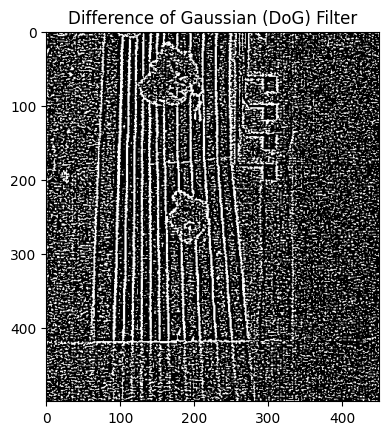

In [90]:
# Difference of Gaussian (DoG) Filter

image = origin

# 應用高斯模糊兩次，使用不同的標準差
gaussian_1 = cv2.GaussianBlur(image, (5, 5), 1)
gaussian_2 = cv2.GaussianBlur(image, (5, 5), 2)

# 計算 DoG 濾波 (高斯模糊結果相減)
dog = gaussian_1 - gaussian_2

# 顯示結果
plt.imshow(dog, cmap='gray')
plt.title('Difference of Gaussian (DoG) Filter')
plt.show()

In [91]:
basic_array_info(dog)

Type:  <class 'numpy.ndarray'>
Shape:  (500, 450)
Max:  255
Min:  0
Mean:  67.79864888888889
Standard Deviation 112.13177378997271


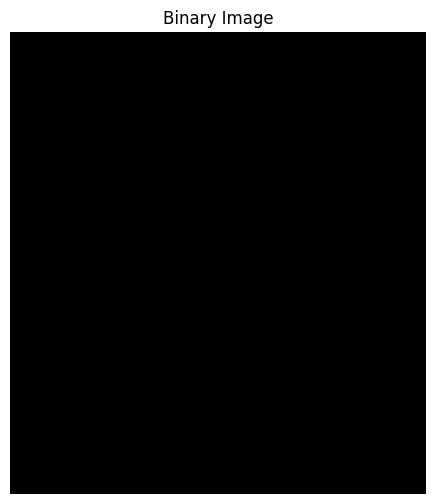

In [92]:
dog_binary = image_binary(dog)

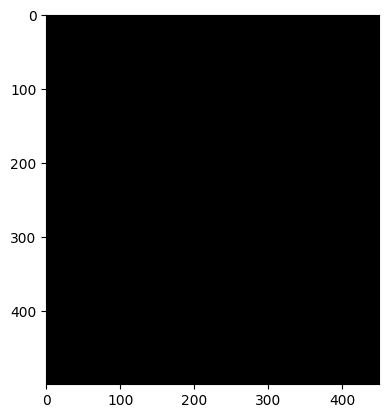

In [93]:
plt.imshow(get_lines_hough(dog_binary), cmap='gray')

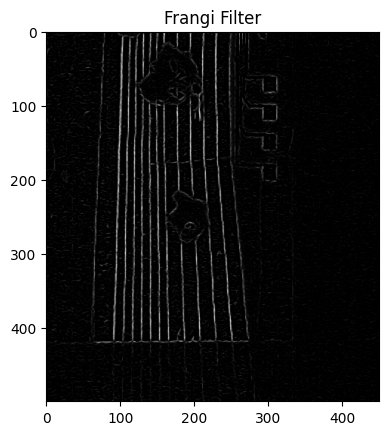

In [94]:
# Frangi Filter

from skimage.filters import frangi
# 應用 Frangi 濾波器
frangi_filtered = frangi(image)

# 顯示結果
plt.imshow(frangi_filtered, cmap='gray')
plt.title('Frangi Filter')
plt.show()

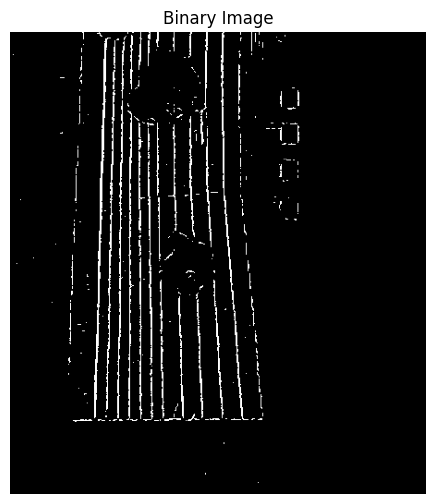

In [95]:
binary_image = image_binary(frangi_filtered*255)

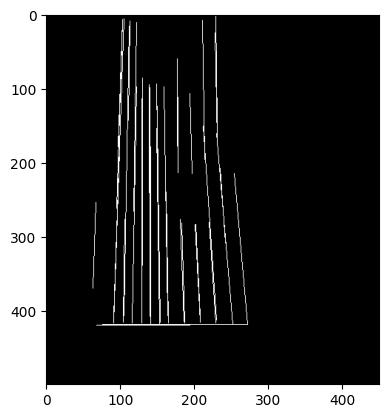

In [96]:
plt.imshow(get_lines_hough(binary_image.astype(np.uint8)), cmap='gray')

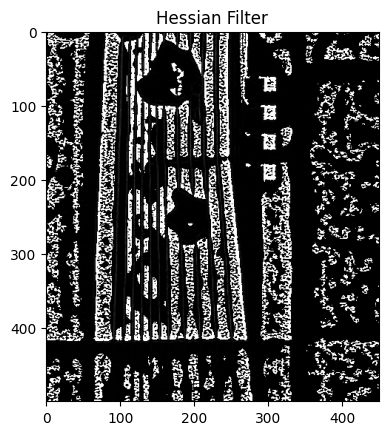

In [97]:
# 應用 Hessian 濾波器

from skimage.filters import hessian

hessian_filtered = hessian(image)

# 顯示結果
plt.imshow(hessian_filtered, cmap='gray')
plt.title('Hessian Filter')
plt.show()

In [98]:
basic_array_info(hessian_filtered)

Type:  <class 'numpy.ndarray'>
Shape:  (500, 450)
Max:  1.0
Min:  3.6097748749186962e-12
Mean:  0.20198282418073107
Standard Deviation 0.39418577812593464


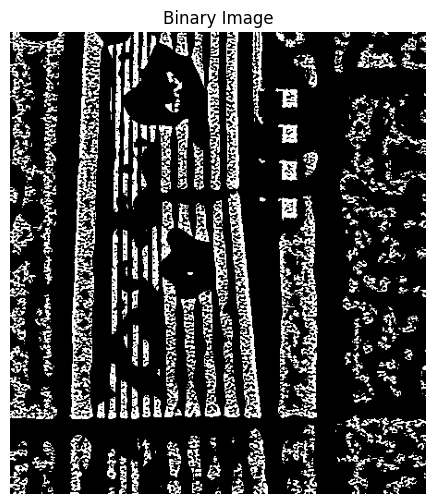

In [99]:
binary_image = image_binary(hessian_filtered*255)

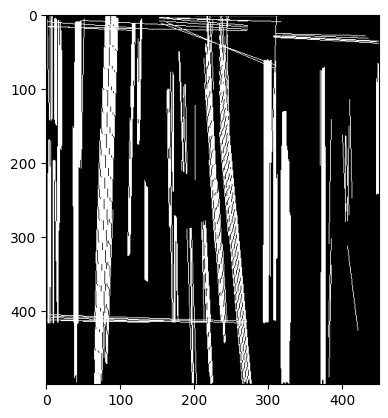

In [100]:
plt.imshow(get_lines_hough(binary_image.astype(np.uint8)), cmap='gray')

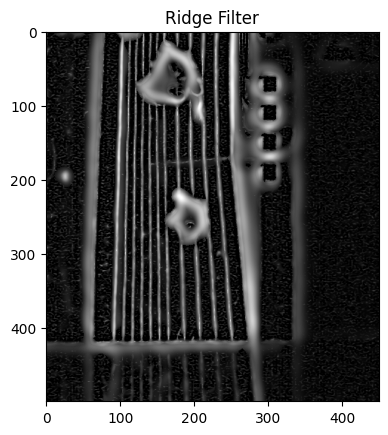

In [101]:
# 應用 Ridge 濾波器
from skimage.filters import meijering

ridge_filtered = meijering(image)

# 顯示結果
plt.imshow(ridge_filtered, cmap='gray')
plt.title('Ridge Filter')
plt.show()

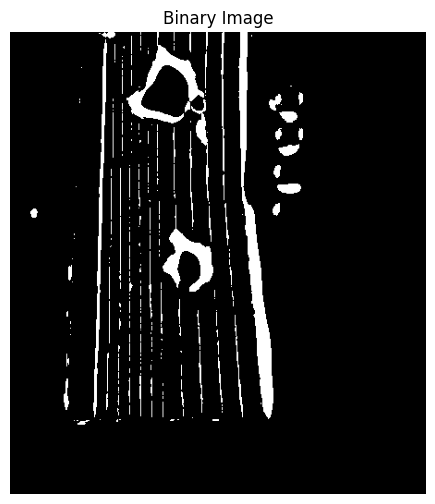

In [102]:
binary_image = image_binary(ridge_filtered*255)

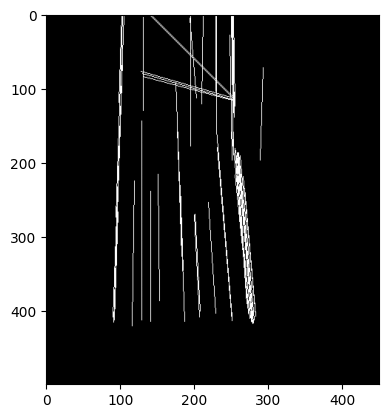

In [103]:
plt.imshow(get_lines_hough(binary_image.astype(np.uint8)), cmap='gray')

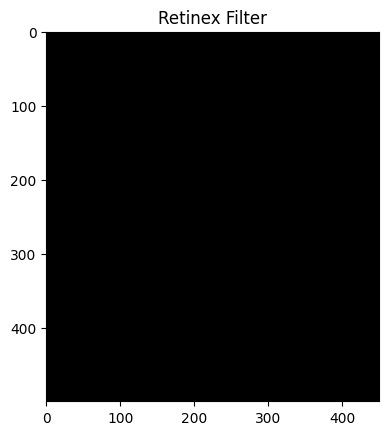

In [104]:
# 將影像轉換為浮點數格式
image = np.float32(image) / 255.0

# 應用 Retinex 濾波器 (使用單尺度 Retinex)
retinex_filtered = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(image.astype(np.uint8))

# 顯示結果
plt.imshow(retinex_filtered, cmap='gray')
plt.title('Retinex Filter')
plt.show()

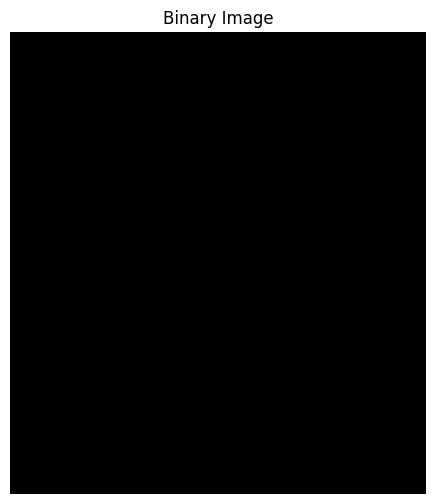

In [105]:
binary_image = image_binary(retinex_filtered)

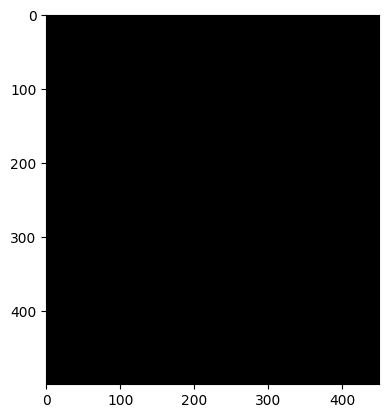

In [106]:
plt.imshow(get_lines_hough(binary_image.astype(np.uint8)), cmap='gray')

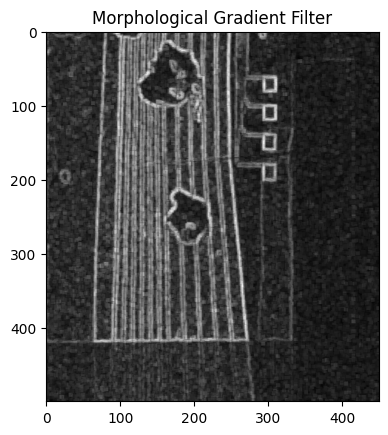

In [107]:
# 應用形態學梯度濾波器
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph_gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# 顯示結果
plt.imshow(morph_gradient, cmap='gray')
plt.title('Morphological Gradient Filter')
plt.show()

In [108]:
morph_gradient = morph_gradient*255

In [109]:
basic_array_info(morph_gradient)

Type:  <class 'numpy.ndarray'>
Shape:  (500, 450)
Max:  69.99999
Min:  1.9999999
Mean:  17.604208
Standard Deviation 10.673875


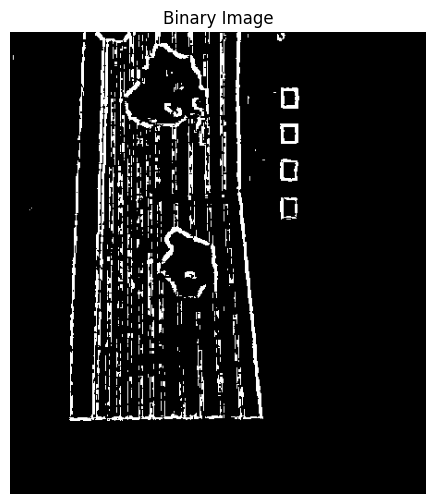

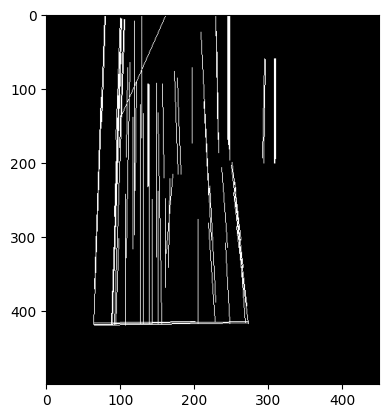

In [110]:
binary_image = image_binary(morph_gradient)
plt.imshow(get_lines_hough(binary_image.astype(np.uint8)), cmap='gray')

In [111]:
import cv2
import numpy as np
import numba as nb

SWF_base = np.array([
    [[1, 1, 0],
     [1, 1, 0],
     [0, 0, 0]],
    [[0, 1, 1],
     [0, 1, 1],
     [0, 0, 0]],
    [[0, 0, 0],
     [0, 1, 1],
     [0, 1, 1]],
    [[0, 0, 0],
     [1, 1, 0],
     [1, 1, 0]],
    [[1, 1, 1],
     [1, 1, 1],
     [0, 0, 0]],
    [[0, 0, 0],
     [1, 1, 1],
     [1, 1, 1]],
    [[1, 1, 0],
     [1, 1, 0],
     [1, 1, 0]],
    [[0, 1, 1],
     [0, 1, 1],
     [0, 1, 1]],
], dtype=np.float32)

SWF_big = np.array([
    [[1, 1, 0],
     [1, 1, 0],
     [0, 0, 0]],
    [[0, 1, 1],
     [0, 1, 1],
     [0, 0, 0]],
    [[0, 0, 0],
     [0, 1, 1],
     [0, 1, 1]],
    [[0, 0, 0],
     [1, 1, 0],
     [1, 1, 0]],
    [[1, 1, 1],
     [1, 1, 1],
     [0, 0, 0]],
    [[0, 0, 0],
     [1, 1, 1],
     [1, 1, 1]],
    [[1, 1, 0],
     [1, 1, 0],
     [1, 1, 0]],
    [[0, 1, 1],
     [0, 1, 1],
     [0, 1, 1]],
    [[1, 1, 1],
     [1, 1, 0],
     [1, 0, 0]],
    [[1, 1, 1],
     [0, 1, 1],
     [0, 0, 1]],
    [[0, 0, 1],
     [0, 1, 1],
     [1, 1, 1]],
    [[1, 0, 0],
     [1, 1, 0],
     [1, 1, 1]],
], dtype=np.float32)
    
@nb.jit(nopython=True)
def numba_computation(h, w, ori_flatten, each_flattens):
    min_dist = np.full(h * w, np.inf)
    min_idx = np.zeros(h * w, dtype=np.int32)
    for i in range(len(each_flattens)):
        dist = (each_flattens[i] - ori_flatten)**2
        for j in range(h * w):
            if dist[j] < min_dist[j]:
                min_dist[j] = dist[j]
                min_idx[j] = i

    dst = np.zeros_like(ori_flatten)
    for j in range(h * w):
        dst[j] = each_flattens[min_idx[j]][j]
    
    return dst
    
def SideWindowFiltering(img, kernel=3, mode='mean', use_big=False):
    if use_big:
        filters = np.array([cv2.resize(f, (kernel, kernel)) for f in SWF_big])
        filters[filters < 0.99] = 0.
    else:
        filters = np.array([cv2.resize(f, (kernel, kernel)) for f in SWF_base])
        filters[filters < 0.99] = 0.
    
    if mode == 'mean':
        filters = [f / np.sum(f) for f in filters]
        each_flattens = np.array([cv2.filter2D(img ,-1, filters[i]).reshape(-1) for i in range(len(filters))])
    elif mode == 'gaussian':
        k = kernel // 2
        x, y = np.mgrid[-k:k+1,-k:k+1]
        sigma = 0.3*((kernel-1)*0.5 - 1) + 0.8
        gaussian_kernel = np.exp(-((x**2+y**2)/(2*sigma**2)))
        filters = [np.multiply(f, gaussian_kernel) for f in filters]
        filters = [f / np.sum(f) for f in filters]
        each_flattens = np.array([cv2.filter2D(img ,-1, filters[i]).reshape(-1) for i in range(len(filters))])
    elif mode == 'median':
        kernel = filters.shape[-1]
        each_flattens = np.array([median_filter(img, filters[i], kernel).reshape(-1) for i in range(len(filters))])

    h, w = img.shape
    ori_flatten = img.reshape(-1)
    dst = numba_computation(h, w, ori_flatten, each_flattens)
    dst = dst.reshape(h, w)
    return dst

def SideWindowFiltering_3d(img, kernel=3, mode='mean', use_big=False):
    """
    Args:
        
        img: A rgb image
        
        kernel: one of integers 3, 5, 7, ...
                use kernel size (3, 3) or (5, 5) or (7, 7) ...
                
        mode: 'mean' or 'median'
              use mean filter or median filter
              
        use_big: default 'False' use 8 angle filters
                 'True' use 12 angle filters
                 
        
    """
    img = img.copy()
    
    dsts = [0, 0, 0]
    for i in range(3):
        dsts[i] = SideWindowFiltering(img[:,:,i], kernel, mode, use_big)
    
    return np.dstack((dsts[0], dsts[1], dsts[2]))

@nb.jit(nopython=True)
def numba_acceleration(img, mask, kernel, h, w, median_idx, dst):
    for i in range(0, h - kernel + 1):
        for j in range(0, w - kernel + 1):
            tmp_arr = []
            for a in range(kernel):
                for b in range(kernel):
                    if mask[a, b] == 1:
                        tmp_arr.append(img[i+a, j+b])
            tmp_arr.sort()
            dst[i, j] = tmp_arr[median_idx]
    return dst

def median_filter(img, mask, kernel=3):
    mask = mask.astype(np.int32)
    median_idx = int(len(np.where(mask > 0)[0]) / 2)
    dst = np.zeros_like(img)
    img = np.pad(img, kernel//2, 'edge')
    h, w = img.shape
    dst = numba_acceleration(img, mask, kernel, h, w, median_idx, dst)
    return dst

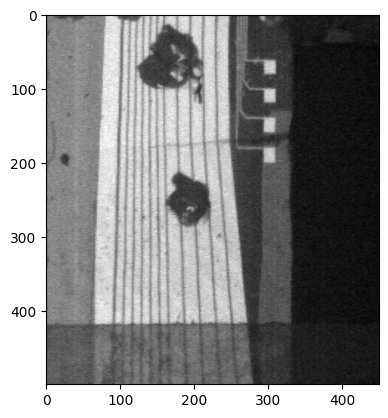

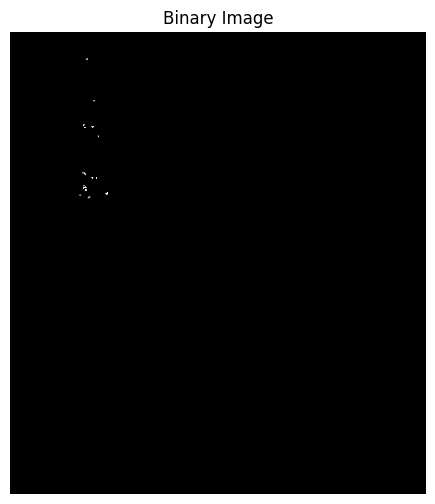

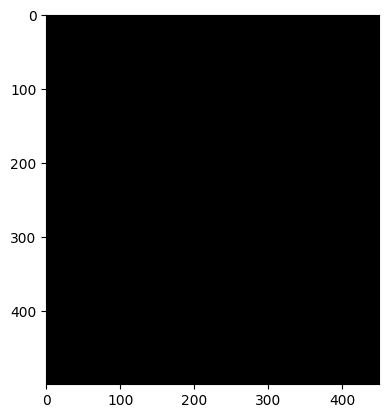

In [112]:
swf_img = SideWindowFiltering(img=origin, kernel=3, mode='mean')
plt.imshow(swf_img, cmap='gray')
binary_image = image_binary(swf_img)
plt.imshow(get_lines_hough(binary_image), cmap='gray')